<a href="https://colab.research.google.com/github/sgracevera/MultiThreading/blob/main/Multi_threading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

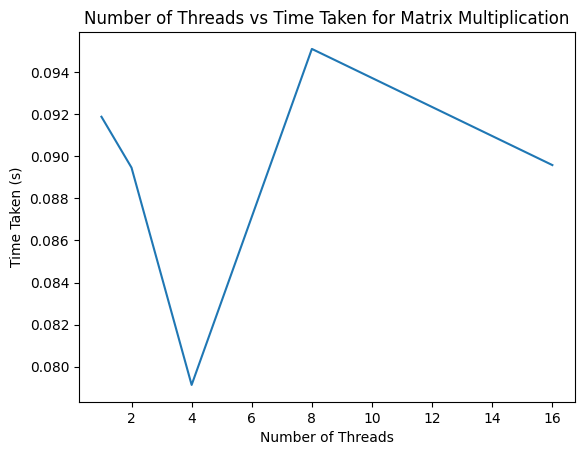

Result Table:
[[ 1.          2.          4.          8.         16.        ]
 [ 0.09188181  0.08946314  0.07913259  0.09510563  0.08958371]]


In [6]:
import numpy as np
import time
import psutil
import matplotlib.pyplot as plt
import os

def matrix_multiplication_experiment(num_matrices, matrix_size, num_threads):
    execution_times = []

    constant_matrix = np.random.rand(matrix_size, matrix_size)

    for i in range(num_matrices):
        start_time = time.time()

        random_matrix = np.random.rand(matrix_size, matrix_size)

        # Set the number of threads for numpy operations
        os.environ["OMP_NUM_THREADS"] = str(num_threads)

        result_matrix = np.matmul(random_matrix, constant_matrix)

        end_time = time.time()
        execution_time = end_time - start_time
        execution_times.append(execution_time)

    return execution_times

def plot_graph(threads, times):
    plt.plot(threads, times)
    plt.xlabel('Number of Threads')
    plt.ylabel('Time Taken (s)')
    plt.title('Number of Threads vs Time Taken for Matrix Multiplication')
    plt.show()

# Parameters
num_matrices = 100
matrix_size = 1000
num_threads_list = [1, 2, 4, 8, 16]  # Vary the number of threads

# Run experiment for each number of threads
execution_times_per_thread = []
for num_threads in num_threads_list:
    execution_times = matrix_multiplication_experiment(num_matrices, matrix_size, num_threads)
    avg_execution_time = np.mean(execution_times)
    execution_times_per_thread.append(avg_execution_time)

# Generate result table
result_table = np.vstack((num_threads_list, execution_times_per_thread))

# Plot graph
plot_graph(num_threads_list, execution_times_per_thread)

# Print result table
print("Result Table:")
print(result_table)


Execution time with 1 threads: 8.255881309509277 seconds
CPU usage: 5.0%
Execution time with 2 threads: 7.2793803215026855 seconds
CPU usage: 22.0%
Execution time with 3 threads: 6.130090951919556 seconds
CPU usage: 4.0%
Execution time with 4 threads: 7.540883541107178 seconds
CPU usage: 4.0%
Execution time with 5 threads: 8.951798915863037 seconds
CPU usage: 3.5%
Execution time with 6 threads: 6.837886571884155 seconds
CPU usage: 55.1%
Execution time with 7 threads: 6.13438868522644 seconds
CPU usage: 4.5%
Execution time with 8 threads: 7.771499156951904 seconds
CPU usage: 4.5%


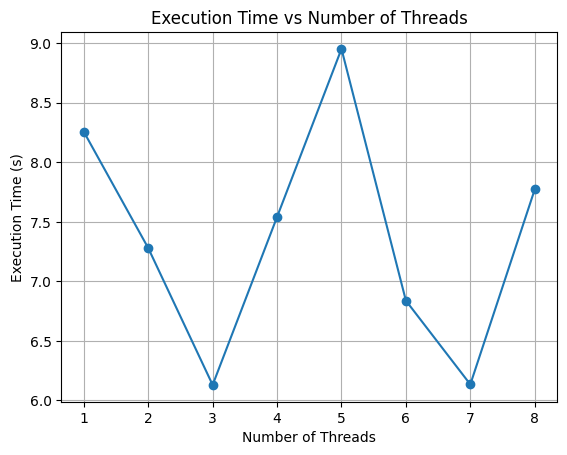

In [9]:
import numpy as np
import time
import concurrent.futures
import matplotlib.pyplot as plt
import psutil

def multiply_matrices(thread_count):
    np.random.seed(0)  # for reproducibility
    constant_matrix = np.random.rand(1000, 1000)
    matrices = [np.random.rand(1000, 1000) for _ in range(100)]
    result_matrices = []

    def multiply(matrix):
        return np.dot(matrix, constant_matrix)

    with concurrent.futures.ThreadPoolExecutor(max_workers=thread_count) as executor:
        start_time = time.time()
        for result in executor.map(multiply, matrices):
            result_matrices.append(result)
        end_time = time.time()

    execution_time = end_time - start_time
    return execution_time

def main():
    thread_counts = [1, 2, 3, 4, 5, 6, 7, 8]
    execution_times = []
    cpu_usages = []

    for thread_count in thread_counts:
        execution_time = multiply_matrices(thread_count)
        execution_times.append(execution_time)
        cpu_usage = psutil.cpu_percent(interval=1)  # measure CPU usage
        cpu_usages.append(cpu_usage)
        print(f"Execution time with {thread_count} threads: {execution_time} seconds")
        print(f"CPU usage: {cpu_usage}%")

    # Generate result table
    table_data = [["Threads", *thread_counts],
                  ["Time taken (s)", *execution_times],
                  ["CPU Usage (%)", *cpu_usages]]

    # Plot graph
    plt.plot(thread_counts, execution_times, marker='o')
    plt.xlabel('Number of Threads')
    plt.ylabel('Execution Time (s)')
    plt.title('Execution Time vs Number of Threads')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()
